<a href="https://colab.research.google.com/github/xehau/xehau_lessons/blob/master/layers_weightnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.


In [ ]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Layers: WeightNormalization

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/layers_weightnormalization"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/addons/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview

This notebook will demonstrate how to use the Weight Normalization layer and how it can improve convergence.


# WeightNormalization

A Simple Reparameterization to Accelerate Training of Deep Neural Networks:

Tim Salimans, Diederik P. Kingma (2016)

> By reparameterizing the weights in this way you improve the conditioning of the optimization problem and speed up convergence of stochastic gradient descent. Our reparameterization is inspired by batch normalization but does not introduce any dependencies between the examples in a minibatch. This means that our method can also be applied successfully to recurrent models such as LSTMs and to noise-sensitive applications such as deep reinforcement learning or generative models, for which batch normalization is less well suited. Although our method is much simpler, it still provides much of the speed-up of full batch normalization. In addition, the computational overhead of our method is lower, permitting more optimization steps to be taken in the same amount of time.

> https://arxiv.org/abs/1602.07868 

<img src="https://raw.githubusercontent.com/seanpmorgan/tf-weightnorm/master/static/wrapped-graph.png" width="80%"><br><br>


## Setup

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 706kB 7.6MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Hyper Parameters
batch_size = 32
epochs = 10
num_classes=10

## Build Models

In [ ]:
# Standard ConvNet
reg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [ ]:
# WeightNorm ConvNet
wn_model = tf.keras.Sequential([
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(6, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(16, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(120, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(84, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(num_classes, activation='softmax')),
])

## Load Data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 3s 0us/step


## Train Models

In [ ]:
reg_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 39s 4ms/step - loss: 1.8411 - accuracy: 0.3287 - val_loss: 1.3892 - val_accuracy: 0.5036
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3878 - accuracy: 0.4994 - val_loss: 1.3418 - val_accuracy: 0.5159
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2581 - accuracy: 0.5491 - val_loss: 1.2412 - val_accuracy: 0.5585
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1705 - accuracy: 0.5790 - val_loss: 1.1555 - val_accuracy: 0.5991
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0890 - accuracy: 0.6143 - val_loss: 1.1524 - val_accuracy: 0.5917
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0356 - accuracy: 0.6328 - val_loss: 1.1244 - val_accuracy: 0.6011
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9827 - accuracy: 0.6496 - val_loss: 1.1379 - val_accuracy

In [ ]:
wn_model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

wn_history = wn_model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test),
                          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.7836 - accuracy: 0.3523 - val_loss: 1.4255 - val_accuracy: 0.4863
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3641 - accuracy: 0.5092 - val_loss: 1.3132 - val_accuracy: 0.5295
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2461 - accuracy: 0.5562 - val_loss: 1.2491 - val_accuracy: 0.5521
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1498 - accuracy: 0.5914 - val_loss: 1.2155 - val_accuracy: 0.5674
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0829 - accuracy: 0.6152 - val_loss: 1.1611 - val_accuracy: 0.5841
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0126 - accuracy: 0.6397 - val_loss: 1.1565 - val_accuracy: 0.5918
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9625 - accuracy: 0.6589 - val_loss: 1.1501 - val_ac

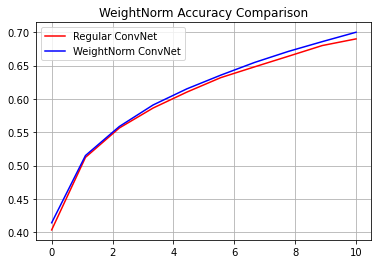

In [ ]:
reg_accuracy = reg_history.history['accuracy']
wn_accuracy = wn_history.history['accuracy']

plt.plot(np.linspace(0, epochs,  epochs), reg_accuracy,
             color='red', label='Regular ConvNet')

plt.plot(np.linspace(0, epochs, epochs), wn_accuracy,
         color='blue', label='WeightNorm ConvNet')

plt.title('WeightNorm Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()